# Extracting data from a json table

In [1]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_json('http://neueda.conygre.com/pydata/Apache-Access-NoMessage2.json')
df.head(10)

,datetime,statuscode,bytes,httpversion,@timestamp,ipaddress,host,path,request,page,clientinfo,message,referrer,@version
0,17/May/2015:10:05:50 +0000,200,41820,HTTP/1.1,2020-09-02T19:08:16.554Z,83.149.9.216,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/presentations/logstash-monitorama-2013/css/fo...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,83.149.9.216 - - [17/May/2015:10:05:50 +0000] ...,http://semicomplete.com/presentations/logstash...,1
1,17/May/2015:10:05:25 +0000,200,8026,HTTP/1.1,2020-09-02T19:08:16.556Z,83.149.9.216,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/presentations/logstash-monitorama-2013/images...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,83.149.9.216 - - [17/May/2015:10:05:25 +0000] ...,http://semicomplete.com/presentations/logstash...,1
2,17/May/2015:10:05:40 +0000,200,3638,HTTP/1.1,2020-09-02T19:08:16.560Z,24.236.252.67,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/favicon.ico,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:26....,24.236.252.67 - - [17/May/2015:10:05:40 +0000]...,-,1
3,17/May/2015:10:05:10 +0000,200,14872,HTTP/1.1,2020-09-02T19:08:16.563Z,50.16.19.13,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/blog/tags/puppet?flav=rss20,Tiny Tiny RSS/1.11 (http://tt-rss.org/),50.16.19.13 - - [17/May/2015:10:05:10 +0000] G...,http://www.semicomplete.com/blog/tags/puppet?f...,1
4,17/May/2015:10:05:46 +0000,200,40693,HTTP/1.1,2020-09-02T19:08:16.566Z,123.125.71.35,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/blog/tags/release,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,123.125.71.35 - - [17/May/2015:10:05:46 +0000]...,-,1
5,17/May/2015:10:05:00 +0000,200,1015,HTTP/1.1,2020-09-02T19:08:16.568Z,66.249.73.185,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/reset.css,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,66.249.73.185 - - [17/May/2015:10:05:00 +0000]...,-,1
6,17/May/2015:10:05:47 +0000,200,9587,HTTP/1.0,2020-09-02T19:08:16.570Z,207.241.237.227,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/blog/geekery/soekris-gpio.html,Mozilla/5.0 (compatible; archive.org_bot +http...,207.241.237.227 - - [17/May/2015:10:05:47 +000...,http://www.semicomplete.com/blog/tags/C,1
7,17/May/2015:10:05:40 +0000,200,24142,HTTP/1.0,2020-09-02T19:08:16.573Z,207.241.237.228,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/blog/tags/defcon,Mozilla/5.0 (compatible; archive.org_bot +http...,207.241.237.228 - - [17/May/2015:10:05:40 +000...,http://www.semicomplete.com/blog/tags/C,1
8,17/May/2015:10:05:39 +0000,200,4877,HTTP/1.1,2020-09-02T19:08:16.576Z,81.220.24.207,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/style2.css,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,81.220.24.207 - - [17/May/2015:10:05:39 +0000]...,http://www.semicomplete.com/blog/geekery/ssl-l...,1
9,17/May/2015:11:05:59 +0000,200,29941,HTTP/1.1,2020-09-02T19:08:16.578Z,74.125.40.20,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/?flav=rss20,FeedBurner/1.0 (http://www.FeedBurner.com),74.125.40.20 - - [17/May/2015:11:05:59 +0000] ...,-,1


## We first created a dataframe of the 10 most popular browsers

In [252]:
df.groupby('clientinfo').count()['datetime'].sort_values(ascending=False)

clientinfo
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.107 Safari/537.36                                                                                           1042
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.91 Safari/537.36                                                                                  369
UniversalFeedParser/4.2-pre-314-svn +http://feedparser.org/                                                                                                                                              364
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:27.0) Gecko/20100101 Firefox/27.0                                                                                                                                 296
Mozilla/5.0 (iPhone; CPU iPhone OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10A5376e Safari/8536.25 (compatible; Googlebot/2.1; +http

In [70]:
df.groupby('clientinfo').count()['datetime'].sort_values(ascending=False).reset_index().head(10)

,clientinfo,datetime
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1042
1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,369
2,UniversalFeedParser/4.2-pre-314-svn +http://fe...,364
3,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:27.0) G...,296
4,Mozilla/5.0 (iPhone; CPU iPhone OS 6_0 like Ma...,271
5,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,268
6,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,237
7,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:27....,235
8,Mozilla/5.0 (X11; Linux x86_64; rv:27.0) Gecko...,229
9,Tiny Tiny RSS/1.11 (http://tt-rss.org/),195


## We visualised the same data as above but in a bar chart.
As part of this we discovered that chrome/safari is the most popular

<BarContainer object of 10 artists>

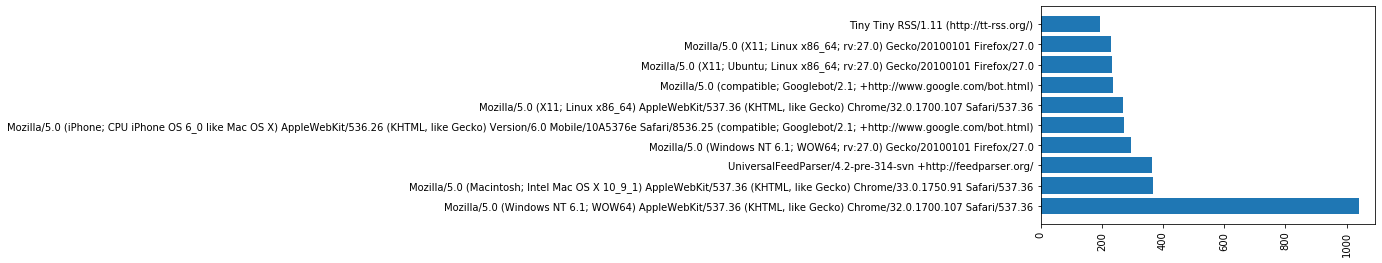

In [92]:
import matplotlib.pyplot as plt

%matplotlib inline

df2 = df.groupby('clientinfo').count()['datetime'].sort_values(ascending=False).reset_index().head(10)

x=df2['clientinfo']
y=df2['datetime']
plt.xticks(rotation=90)
plt.barh(x,y)


## A visualisation of the most popular types of requests

<BarContainer object of 4 artists>

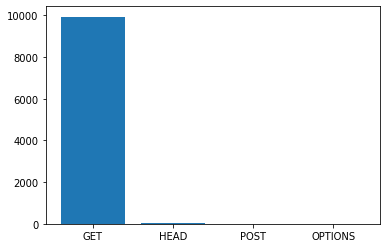

In [85]:
df2=df.groupby('request').count()['datetime'].sort_values(ascending=False).reset_index()
df2
x=df2['request']
y=df2['datetime']
plt.bar(x,y)


### After researching, we found that 300 codes were redirection errors, 400 codes were client errors (e.g. typed address wrong), 200 codes were successful or partially successful

Here we put the most likely codes in ascending order

In [100]:
df3=df.groupby('statuscode').count()['datetime'].sort_values(ascending=False).reset_index()
df3

,statuscode,datetime
0,200,9113
1,304,445
2,404,212
3,301,164
4,206,45
5,500,3
6,416,2
7,403,2


This is where we developed a smaller dataframe of the number of successful requests compared to the number of errors

In [183]:
errors = df.loc[df['statuscode'] != 200].count()['datetime']
passes = df.loc[df['statuscode']==200].count()['datetime']
errors

873

In [179]:
errors_passes = pd.DataFrame({'Errors':[errors],'Passes':[passes]})
errors_passes

,Errors,Passes
0,873,9113


# Get geolocation information for each IP address
We created a 'for loop' to go through the data frame and add the IP address to the URL to collect the geolocation through 'freegeoip.app'

In [187]:
import requests

ipaddress = df['ipaddress'].unique()
returns = []

for i in range(len(ipaddress)):
    url = "https://freegeoip.app/json/" + ipaddress[i]

    headers = {
        'accept': "application/json",
        'content-type': "application/json"
        }

    response = requests.request("GET", url, headers=headers)
    
    returns.append(response.text)
    
    
returns

['{"ip":"83.149.9.216","country_code":"RU","country_name":"Russia","region_code":"MOW","region_name":"Moscow","city":"Moscow","zip_code":"129085","time_zone":"Europe/Moscow","latitude":55.7483,"longitude":37.6171,"metro_code":0}\n',
 '{"ip":"24.236.252.67","country_code":"US","country_name":"United States","region_code":"MI","region_name":"Michigan","city":"Holland","zip_code":"49424","time_zone":"America/Detroit","latitude":42.8123,"longitude":-86.1421,"metro_code":563}\n',
 '{"ip":"50.16.19.13","country_code":"US","country_name":"United States","region_code":"VA","region_name":"Virginia","city":"Ashburn","zip_code":"20149","time_zone":"America/New_York","latitude":39.0481,"longitude":-77.4729,"metro_code":511}\n',
 '{"ip":"123.125.71.35","country_code":"CN","country_name":"China","region_code":"BJ","region_name":"Beijing","city":"Beijing","zip_code":"","time_zone":"Asia/Shanghai","latitude":39.9285,"longitude":116.385,"metro_code":0}\n',
 '{"ip":"66.249.73.185","country_code":"US","c

## We then seperated the countries and ip's from the json in the previous output. These were then added to their own lists and converted into a dataframe

In [190]:
country_names = []
ip = []

for i in range(len(returns)):
    data = returns[i].split('"')
    ip.append(data[3])
    country_names.append(data[11])

In [191]:
df_ip = pd.DataFrame(
    {'ipaddress': ip,
     'country_name': country_names
    })

df_ip

,ipaddress,country_name
0,83.149.9.216,Russia
1,24.236.252.67,United States
2,50.16.19.13,United States
3,123.125.71.35,China
4,66.249.73.185,United States
...,...,...
1746,151.250.94.199,Turkey
1747,72.182.137.233,United States
1748,188.252.129.118,Croatia
1749,109.163.234.2,Romania


## Joining our table with the new data

We used a left merge on the ip addresses to join the two tables together and then get country specific information.

In [197]:
srcs = ['statuscode','country']
df_new = pd.merge(df, df_ip, how='left', on='ipaddress', suffixes=srcs)
df_new

,datetime,statuscode,bytes,httpversion,@timestamp,ipaddress,host,path,request,page,clientinfo,message,referrer,@version,country_name
0,17/May/2015:10:05:50 +0000,200,41820,HTTP/1.1,2020-09-02T19:08:16.554Z,83.149.9.216,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/presentations/logstash-monitorama-2013/css/fo...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,83.149.9.216 - - [17/May/2015:10:05:50 +0000] ...,http://semicomplete.com/presentations/logstash...,1,Russia
1,17/May/2015:10:05:25 +0000,200,8026,HTTP/1.1,2020-09-02T19:08:16.556Z,83.149.9.216,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/presentations/logstash-monitorama-2013/images...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,83.149.9.216 - - [17/May/2015:10:05:25 +0000] ...,http://semicomplete.com/presentations/logstash...,1,Russia
2,17/May/2015:10:05:40 +0000,200,3638,HTTP/1.1,2020-09-02T19:08:16.560Z,24.236.252.67,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/favicon.ico,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:26....,24.236.252.67 - - [17/May/2015:10:05:40 +0000]...,-,1,United States
3,17/May/2015:10:05:10 +0000,200,14872,HTTP/1.1,2020-09-02T19:08:16.563Z,50.16.19.13,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/blog/tags/puppet?flav=rss20,Tiny Tiny RSS/1.11 (http://tt-rss.org/),50.16.19.13 - - [17/May/2015:10:05:10 +0000] G...,http://www.semicomplete.com/blog/tags/puppet?f...,1,United States
4,17/May/2015:10:05:46 +0000,200,40693,HTTP/1.1,2020-09-02T19:08:16.566Z,123.125.71.35,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/blog/tags/release,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,123.125.71.35 - - [17/May/2015:10:05:46 +0000]...,-,1,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,20/May/2015:21:05:25 +0000,200,659,HTTP/1.1,2020-09-02T19:08:19.120Z,38.99.236.50,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/presentations/logstash-puppetconf-2012/css/pr...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,38.99.236.50 - - [20/May/2015:21:05:25 +0000] ...,http://semicomplete.com/presentations/logstash...,1,United States
9982,20/May/2015:21:05:16 +0000,200,65917,HTTP/1.1,2020-09-02T19:08:19.170Z,38.99.236.50,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/presentations/logstash-puppetconf-2012/images...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,38.99.236.50 - - [20/May/2015:21:05:16 +0000] ...,http://semicomplete.com/presentations/logstash...,1,United States
9983,20/May/2015:21:05:07 +0000,200,80663,HTTP/1.1,2020-09-02T19:08:19.171Z,38.99.236.50,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/presentations/logstash-puppetconf-2012/images...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,38.99.236.50 - - [20/May/2015:21:05:07 +0000] ...,http://semicomplete.com/presentations/logstash...,1,United States
9984,20/May/2015:21:05:06 +0000,200,58123,HTTP/1.1,2020-09-02T19:08:19.172Z,38.99.236.50,tpslaptop.localdomain,/home/steve/Downloads/apache.log,GET,/presentations/logstash-puppetconf-2012/images...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,38.99.236.50 - - [20/May/2015:21:05:06 +0000] ...,http://semicomplete.com/presentations/logstash...,1,United States


We then created a dataframe grouped by the status code to get an idea of how common errors are

In [198]:
df.groupby('statuscode').count()['datetime'].reset_index()

,statuscode,datetime
0,200,9113
1,206,45
2,301,164
3,304,445
4,403,2
5,404,212
6,416,2
7,500,3


### The reason found for the number of errors in the US was that they had far more requests than other countires and therefore we took the data analysis in another direction

In [253]:
df_new.groupby('country_name').count()['datetime'].sort_values(ascending = False).head(10)

country_name
United States     3925
France             863
Germany            560
Sweden             429
India              422
China              417
Russia             289
United Kingdom     263
Spain              222
Canada             214
Name: datetime, dtype: int64

This seperates the data for each error code in the dataframe.

In [221]:
df_error304=df_new.loc[df_new['statuscode']==304]
df_error404=df_new.loc[df_new['statuscode']==404]
df_error301=df_new.loc[df_new['statuscode']==301]
df_error303=df_new.loc[df_new['statuscode']==403]
df_error200=df_new.loc[df_new['statuscode']==200]
df_error206=df_new.loc[df_new['statuscode']==206]
df_error416=df_new.loc[df_new['statuscode']==416]
df_error500=df_new.loc[df_new['statuscode']==500]

We were then able to group the error codes by the page column which enabled us to make new dataframes which can be manipulated to show the the pages which had the most errors of this category.

In [229]:
dferror304 = df_error304.groupby('page').count()['datetime'].sort_values(ascending=False)
dferror404 = df_error404.groupby('page').count()['datetime'].sort_values(ascending=False)
dferror301 = df_error301.groupby('page').count()['datetime'].sort_values(ascending=False)
dferror303 = df_error303.groupby('page').count()['datetime'].sort_values(ascending=False)
dferror200 = df_error200.groupby('page').count()['datetime'].sort_values(ascending=False)
dferror206 = df_error206.groupby('page').count()['datetime'].sort_values(ascending=False)
dferror416 = df_error416.groupby('page').count()['datetime'].sort_values(ascending=False)
dferror500 = df_error500.groupby('page').count()['datetime'].sort_values(ascending=False)

In [254]:
int(input())
errors_passes_new = pd.DataFrame({'Error 304':dferror304}).head(10)
errors_passes_new

,Error 304
page,
/style2.css,14
/presentations/logstash-scale11x/images/ahhh___rage_face_by_samusmmx-d5g5zap.png,13
/images/jordan-80.png,11
/favicon.ico,11
/reset.css,10
/images/web/2009/banner.png,10
/files/logstash/logstash-1.1.0-monolithic.jar,10
/projects/xdotool/xdotool.xhtml,6
/presentations/logstash-scale11x/images/tiered-redis-input.jpg,5


This shows the same but not in a dataframe

In [249]:
df_error304.groupby('page').count()['datetime'].sort_values(ascending=False).head(10)

page
/style2.css                                                                         14
/presentations/logstash-scale11x/images/ahhh___rage_face_by_samusmmx-d5g5zap.png    13
/images/jordan-80.png                                                               11
/favicon.ico                                                                        11
/reset.css                                                                          10
/images/web/2009/banner.png                                                         10
/files/logstash/logstash-1.1.0-monolithic.jar                                       10
/projects/xdotool/xdotool.xhtml                                                      6
/presentations/logstash-scale11x/images/tiered-redis-input.jpg                       5
/resume.xml                                                                          5
Name: datetime, dtype: int64